# Sentiment Analysis of Twitter Feedback Data on Apple and Google Products

According to a "youtuber who analyses apple products", apple have the best smartphones and products in the world. Is "he" right? Let's look at the stats. More than 100 million people use Macs globally. Apple had the best-selling smartphones worldwide in 2021. In 2022, iPhone sales were $42.626 billion, versus $38.868 billion the previous year. Revenue for the second quarter of 2023 came in at $94.8B versus the consensus estimate of $92.9B and according to investing.com (https://www.investing.com/academy/statistics/apple-facts/#:~:text=Apple%20had%20the%20best%2Dselling,million%20people%20use%20Macs%20globally.) as of July this year, apple leads the pack with smartphone market share of 28.39%. Okay so maybe "youtuber" has a point. "He" vedios have views of over "890" with "767890" subscribers. Youtubers like "him" and others influence the 2.1 billion plus active youtube users to take interest and even buy an iphone which in part demonstrates the linkage between apple and google product users.

With the number of apple users growing and the use of new slang and new urban abbreviated words rising for example omfgpm, it is increasingly difficult to keep up with the feedback on twitter. 

We can use machine learning to see whether the emotion of a tweet is positive, negative or neutral. Tweets are different that other text data because they are usually in informal conversational language and they they are short. It is important for apple and google to monitor their twitter feed meticulously so as to observe customer opinion and adjust their policies where necessary. If not, they should outsource analytics services from analytics companies.

### METHODOLOGY
The project will follow a structured methodology encompassing the following steps:
* Data Collection: The data was sourced from [here](https://data.world/crowdflower/brands-and-product-emotions). It contains tweet reviews of apple and google products.
* Data Preprocessing: Clean and preprocess the tweet data by removing URLS and hashtags, irrelevant information like special twitter wordsd e.g TR, and performing tasks such as tokenization, and removing stopwords.
* List of libraries used and why:
    * import re #text data preprocessing
    * import string #collection of string functions
    * import nltk #for NLP tasks
    * import pandas as pd 
    * from textblob import TextBlob #NLP library
    * from collections import Counter #frequency analysis
    * import matplotlib.pyplot as plt #plotting visualization
    * from nltk.corpus import stopwords #list of common stop words in different languages
    * from textblob import TextBlob #NLP library
    * from collections import Counter #frequency analysis
    * from sklearn.feature_extraction.text #provides tools for text data preprocessing
    * import TfidfVectorizer #Converts text data into numerical 
* Model: Train a machine learning model (such as a LSTM, GRU and RNN for deep learning model) using the preprocessed dataset to classify tweets into positive, negative, or neutral sentiments. Evaluate the model's performance using appropriate evaluation metrics. (ADD MORE]
* Evaluation: 
(ADDMORE]

* Insights and Recommendations: Analyze sentiment analysis results to generate actionable insights and recommendations for improving customer satisfaction, addressing pain points, and managing brand reputation effectively.
* Response and Engagement Strategy: Develop a strategy for airlines to respond to negative sentiment and engage with customers in a timely and personalized manner. Implement systems and processes to manage customer feedback, complaints, and turnaround negative experiences into positive ones.

## Data Preparation

In [9]:
# import necessary libraries
import re
import string
import nltk
import pandas as pd
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
main_df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding="latin-1")
main_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,emotion_described,original_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


## Data Exploration and Preprocessing

In [11]:
main_df.shape


(9093, 4)

Let's explore the dataset to understand its contents.

In [12]:
def describe_columns(df):
    # Print column names
    print("Column Names:")
    print(main_df.columns)

    # Print data types
    print("\nData Types:")
    print(main_df.dtypes)

    # Print number of rows and columns
    print("\nShape:")
    print(main_df.shape)

    # Print df information
    print("\nInfo:")
    print(main_df.info())

    # Print descriptive statistics for numerical columns
    print("\nDescriptive Statistics:")
    print(main_df.describe())

    # Print missing values count per column
    print("\nMissing Values in percentages:")
    print((main_df.isna().sum()/len(main_df)) * 100)

describe_columns(main_df)

Column Names:
Index(['tweet_text', 'emotion_in_tweet_is_directed_at', 'emotion_described',
       'original_tweet_text'],
      dtype='object')

Data Types:
tweet_text                         object
emotion_in_tweet_is_directed_at    object
emotion_described                  object
original_tweet_text                object
dtype: object

Shape:
(9093, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   tweet_text                       9092 non-null   object
 1   emotion_in_tweet_is_directed_at  3291 non-null   object
 2   emotion_described                9093 non-null   object
 3   original_tweet_text              9092 non-null   object
dtypes: object(4)
memory usage: 284.3+ KB
None

Descriptive Statistics:
                                               tweet_text  \
count                          

Missing values in the "tweet_text" will be dropped to ensure model runs effectively

In [25]:
main_df.dropna(subset=['tweet_text'], inplace=True)

In [26]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tweet_text                       9092 non-null   object 
 1   emotion_in_tweet_is_directed_at  3291 non-null   object 
 2   emotion_described                9092 non-null   object 
 3   original_tweet_text              9092 non-null   object 
 4   clean_text                       9092 non-null   object 
 5   sentiment                        9092 non-null   float64
 6   sentiment_label                  9092 non-null   object 
dtypes: float64(1), object(6)
memory usage: 568.2+ KB


In [27]:
# Removing @ symbol on tweet_text but retain them in original_tweet_text column for contextual purposes
def remove_nametags(sentence):
    """A simple function to remove name tags"""
    if isinstance(sentence, str):
        clean_words = []
        for word in sentence.split():
            if "@" not in word:
                clean_words.append(word)
        return " ".join(clean_words)
    else:
        return sentence

main_df["tweet_text"] = main_df["tweet_text"].apply(remove_nametags)

In [28]:
main_df[:50]

,tweet_text,emotion_in_tweet_is_directed_at,emotion_described,original_tweet_text,clean_text,sentiment,sentiment_label
0,I have a 3G iPhone. After 3 hrs tweeting at #R...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,3g iphone 3 hrs tweeting dead need upgrade plu...,-0.250000,Negative
1,Know about ? Awesome iPad/iPhone app that you'...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...,0.466667,Positive
2,Can not wait for #iPad 2 also. They should sal...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...,wait 2 also sale,-0.155556,Negative
3,I hope this year's festival isn't as crashy as...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...,hope years festival isnt crashy years iphone app,0.000000,Neutral
4,great stuff on Fri #SXSW: Marissa Mayer (Googl...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim oreil...,0.800000,Positive
5,New iPad Apps For #SpeechTherapy And Communica...,NaN,No emotion toward brand or product,@teachntech00 New iPad Apps For #SpeechTherapy...,new ipad apps communication showcased conference,0.136364,Positive
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,"#SXSW is just starting, #CTIA is around the co...",starting around corner hop skip jump good time...,0.233333,Positive
8,Beautifully smart and simple idea RT wrote abo...,iPad or iPhone App,Positive emotion,Beautifully smart and simple idea RT @madebyma...,beautifully smart simple idea wrote ipad app,0.107143,Positive
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,Counting down the days to #sxsw plus strong Ca...,counting days plus strong canadian dollar mean...,0.138889,Positive
10,Excited to meet the at #sxsw so I can show the...,Android,Positive emotion,Excited to meet the @samsungmobileus at #sxsw ...,excited meet show sprint galaxy still running ...,-0.062500,Negative


In [29]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [30]:
# download stop words
# nltk.download('stopwords') (commented because it is already downloaded and up to date)

# clean the text data
def clean_text(text):
    # Remove URLs, hashtags, targets, and special Twitter words
    text = re.sub(r"http\S+|www\S+|https\S+|@\S+|#\S+|RT", "", text)
    
    # Convert text to lowercase
    text = text.lower()
        
    # Replace emoticons with sentiment polarity (not implemented here, requires mapping)
    
    # Remove punctuation and special characters
    text = "".join([char for char in text if char not in string.punctuation])
    
    # Tokenize the text which splits text into words
    tokens = text.split()

    # Remove stopwords 
    stopwords_list = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Join tokens back into text
    text = ' '.join(tokens)
    
    return text

main_df['clean_text'] = main_df['tweet_text'].apply(clean_text)
    

I would like to check most common negative and positive words in the dataset

In [31]:
#pip install textblob


In [32]:
# sentiment analysis

# Function to perform sentiment analysis and create a frequency table
def analyze_sentiments_and_plot_frequency(main_df, tweet_text):
    # Creating a TextBlob object for each tweet and calculate sentiment
    main_df['sentiment'] = main_df[tweet_text].apply(lambda x: TextBlob(x).sentiment.polarity)
    
    # Define sentiment labels
    def get_sentiment_label(sentiment):
        if sentiment > 0:
            return 'Positive'
        elif sentiment < 0:
            return 'Negative'
        else:
            return 'Neutral'
    
    main_df['sentiment_label'] = main_df['sentiment'].apply(get_sentiment_label)
    
    # Create a frequency table for sentiment labels
    sentiment_counts = Counter(main_df['sentiment_label'])
    return sentiment_counts

sentiment_counts = analyze_sentiments_and_plot_frequency(main_df, 'tweet_text')
analyze_sentiments_and_plot_frequency(main_df, 'tweet_text')
print(sentiment_counts)

Counter({'Positive': 4450, 'Neutral': 3396, 'Negative': 1246})


Let's plot a bar graph to represent this information

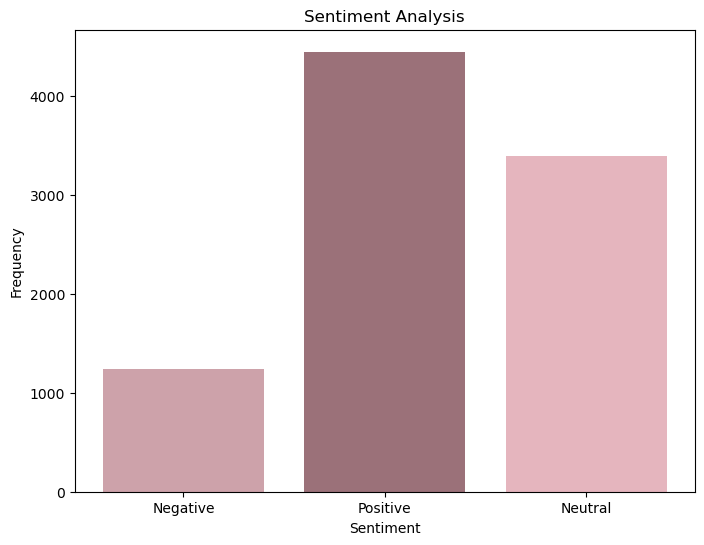

In [33]:
import matplotlib.pyplot as plt

colors = {
    'Positive': '#9b7179',
    'Negative': '#cda2aa',
    'Neutral': '#e5b5be'
}

# Plot a bar graph for sentiment frequency
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=[colors[label] for label in sentiment_counts.keys()])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.show()

In [34]:
pip install wordcloud

Now lets visualize this in wordcloud

In [35]:
# create wordcloud viz

In [36]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Now lets change the categorical data to numeric by using vectorizer

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill missing values in 'tweet_text' with empty strings since I do not want to drop missing values
main_df['tweet_text'].fillna('', inplace=True)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(main_df['tweet_text'])

# Convert the TF-IDF matrix to a DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the TF-IDF matrix (numeric representation of text)
print(tfidf_df)

       00  000  00am  00pm  01am   02   03  0310apple   06   08  ...   ûò  \
0     0.0  0.0   0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  ...  0.0   
1     0.0  0.0   0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  ...  0.0   
2     0.0  0.0   0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  ...  0.0   
3     0.0  0.0   0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  ...  0.0   
4     0.0  0.0   0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  ...  0.0   
...   ...  ...   ...   ...   ...  ...  ...        ...  ...  ...  ...  ...   
9087  0.0  0.0   0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  ...  0.0   
9088  0.0  0.0   0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  ...  0.0   
9089  0.0  0.0   0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  ...  0.0   
9090  0.0  0.0   0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  ...  0.0   
9091  0.0  0.0   0.0   0.0   0.0  0.0  0.0        0.0  0.0  0.0  ...  0.0   

      ûòand   ûó  ûócan  ûójust  ûólewis  ûólots  ûómy  ûóthe        ü_  
0